In [28]:
import pandas as pd

# Load training and test data
train = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv")
test = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv")

In [29]:
#Printing first few rows using head() function
print("Train dataset: \n",train.head(5))

Train dataset: 
    id area_type   availability                 location       size  \
0   0    type_I  Ready To Move  Banashankari 2 nd Stage      3 BHK   
1   1    type_I  Ready To Move                 Balagere      2 BHK   
2   2    type_I         17-Oct     Banashankari Stage V      3 BHK   
3   3    type_I  Ready To Move           Thigalarapalya      3 BHK   
4   4  type_III  Ready To Move                    arudi  3 Bedroom   

   total_sqft  bath  balcony   price  
0      1030.0   2.0      2.0   77.25  
1      1210.0   2.0      1.0   83.00  
2      1540.0   3.0      2.0   48.51  
3      1830.0   4.0      2.0  135.00  
4         NaN   2.0      0.0   80.00  


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [30]:
print("Test dataset: \n",test.head(5))

Test dataset: 
    id area_type   availability        location       size  total_sqft  bath  \
0   0   type_II  Ready To Move  Banjara Layout  2 Bedroom      1050.0   2.0   
1   1    type_I  Ready To Move     Rajiv Nagar      3 BHK      1690.0   3.0   
2   2   type_II  Ready To Move          Hebbal      2 BHK      1100.0   2.0   
3   3  type_III  Ready To Move     Munnekollal  6 Bedroom      1200.0   4.0   
4   4   type_II         18-Apr    Choodasandra  4 Bedroom      2429.0   3.0   

   balcony  
0      1.0  
1      1.0  
2      1.0  
3      2.0  
4      1.0  


In [31]:
#Checking the data types(test and train both have the same columns hence same data types too)
print("Data types in the dataset: ")
train.dtypes

Data types in the dataset: 


id                int64
area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [32]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['id', 'total_sqft', 'bath', 'balcony', 'price']
Categorical Columns: ['area_type', 'availability', 'location', 'size']


# Inferences
## Data Types
   - There are two datatypes being Numeric and Categorical
   - Numeric Columns like total_sqft,bath, balcony, price are float64 while id is int 64. These can be used for mathematical operations, statistics and modeling
   - Columns area_type,availability, location, size are categorical and hold strings or mixed type values. They represent discrete categories and need encoding for ML modeling.
   - Id is a indexing column used to differentiate the tuples and has no significant effect on the house pricing

# Descriptive Statistics

In [33]:
# Display descriptive statistics for numerical columns
numerical_summary = train.describe().T  # Transpose for better readability
numerical_summary['median'] = train.median(numeric_only=True)  # Add median column

numerical_summary

,count,mean,std,min,25%,50%,75%,max,median
id,10000.0,4999.500000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0,4999.5
total_sqft,9967.0,1570.095822,1302.566836,1.0,1100.00,1279.0,1682.50,52272.0,1279.0
bath,9936.0,2.692029,1.274172,1.0,2.00,2.0,3.00,18.0,2.0
balcony,9525.0,1.585302,0.814347,0.0,1.00,2.0,2.00,3.0,2.0
price,10000.0,113.275879,151.802643,8.0,50.00,72.0,120.00,3600.0,72.0


# Inferecnes
1. total square feet
   - Minimum value is 1 which is not obvious as no plot can be 1 sq feet
   - Maximum value is 52,000 while the average and median lie close to a 1000 suggesting outliers
   - This can also be proved by the values of 25 and 75 percentile values
2. bath
   - mean of 2.7 bathrooms sounds plausible as it is in between 2-3
   - Maximum value is 18 suggesting outliers
3. balcony
   - Feature is relatively clean, no extreme outliers.
4. price
   - target variable
   - no missing values but shows large variation (151.8)
   - min and max values suggest outliers
It can be seen that first 3 features have few missing variables which need to be imputed

# Missing values

In [34]:
# Check total missing values in each column
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_percentage = (train.isnull().sum() / len(train) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percentage
})

missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Missing %
balcony,475,4.75
bath,64,0.64
total_sqft,33,0.33
size,13,0.13
location,1,0.01


In [35]:
# Handling missing values

# Numerical Columns
for col in numerical_cols:
    train[col] = train[col].fillna(train[col].median())

# Categorical Columns
for col in categorical_cols:
    train[col] = train[col].fillna(train[col].mode()[0])

# Verification
train.isnull().sum().sum()

0

# Inferences
#### Missing values are imputed with the median value for numerical datatypes and mode for categorical datatypes to maintain consistency

# Duplicates

In [36]:
# Check for duplicate rows
duplicate_rows = train.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows) #No duplicates

Number of duplicate rows: 0


# Inference
No duplicate rows thus we can skip this step (Remove duplicate rows if found)

# Outliers

In [37]:
# Example: Detect outliers in numerical datatypes using IQR
variables=['total_sqft','bath','balcony','price']
for var in variables:
    Q1 = train[var].quantile(0.25)
    Q3 = train[var].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train[(train[var] < lower_bound) | (train[var] > upper_bound)]
    print(f"Number of outliers in {var}: {len(outliers)}")

Number of outliers in total_sqft: 900
Number of outliers in bath: 781
Number of outliers in balcony: 0
Number of outliers in price: 966


In [38]:
#Only for demonstration of outlier handling final case done in pipeline
def remove_outliers_percentile(df, col, percentile=0.99):
    upper_limit = df[col].quantile(percentile)
    return df[df[col] <= upper_limit]

# Convert columns to numeric (safety step)
for col in ['total_sqft', 'bath', 'price']:
    train[col] = pd.to_numeric(train[col], errors='coerce')

# Apply 95th percentile filtering
for col in ['total_sqft', 'bath', 'price']:
    train = remove_outliers_percentile(train, col, 0.99)

print("Remaining rows after 95th percentile filtering:", train.shape)

# Example: Verify outliers in numerical features using IQR
variables=['total_sqft','bath','balcony','price']
for var in variables:
    Q1 = train[var].quantile(0.25)
    Q3 = train[var].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train[(train[var] < lower_bound) | (train[var] > upper_bound)]
    print(f"Number of outliers in {var}: {len(outliers)}")

Remaining rows after 95th percentile filtering: (9717, 9)
Number of outliers in total_sqft: 779
Number of outliers in bath: 601
Number of outliers in balcony: 0
Number of outliers in price: 848


# Inferences
All the features have less than 9% of their data being outliers which is a reasonable amount

# Visualisations

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

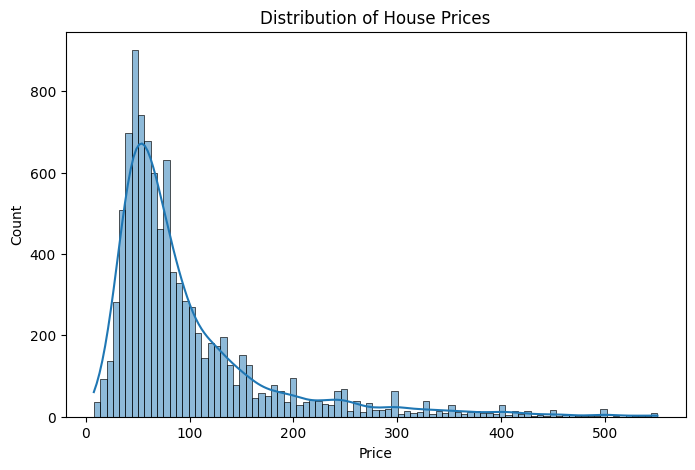

In [40]:
#Price Distribution using Histogram
plt.figure(figsize=(8,5))
sns.histplot(train['price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

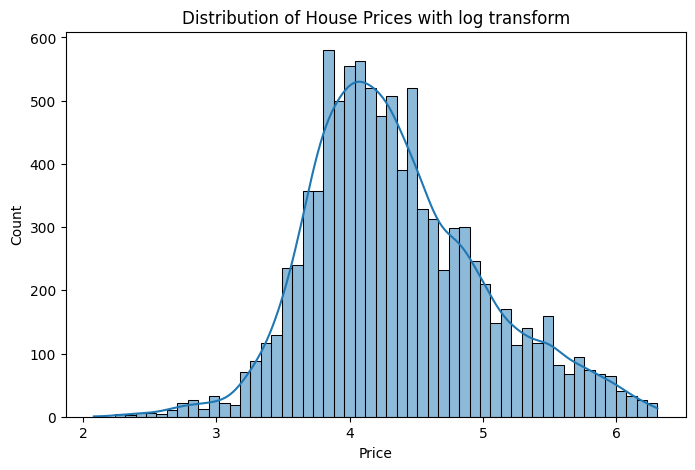

In [41]:
#Price Distribution using Histogram and log transformation
plt.figure(figsize=(8,5))
sns.histplot(np.log(train['price']), kde=True)
plt.title("Distribution of House Prices with log transform")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [42]:
import numpy as np

# Check for infinities in the whole dataset
print(np.isinf(train["price"]).sum().sum(), "infinite values found")
print(np.isnan(train["price"]).sum().sum(), "NaN values found")

0 infinite values found
0 NaN values found


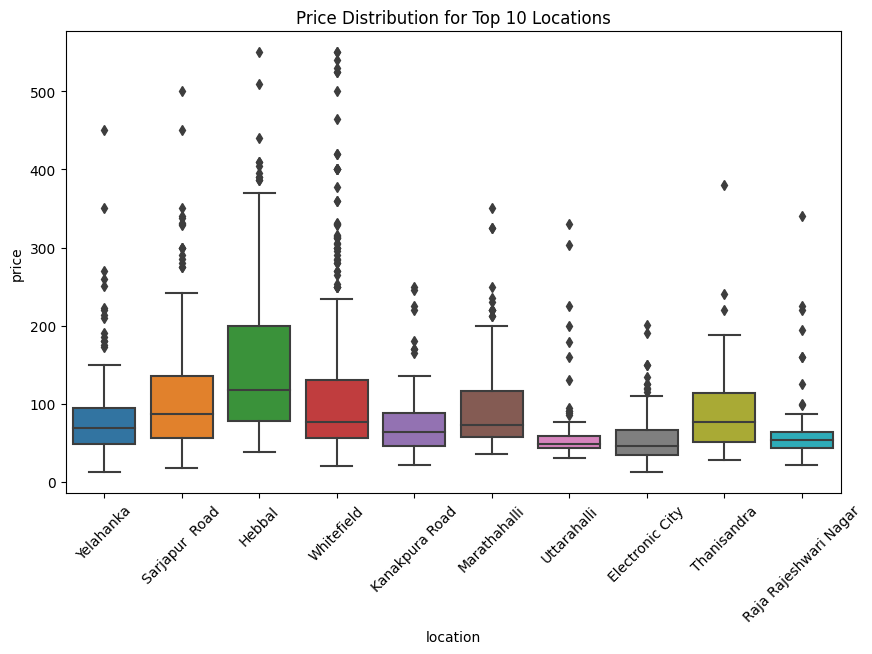

In [43]:
#Price across top 10 locations
# Get top 10 most frequent locations
top_locations = train['location'].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.boxplot(data=train[train['location'].isin(top_locations)], x='location', y='price')
plt.title("Price Distribution for Top 10 Locations")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_37/1388083568.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='total_sqft', y='price', data=train, palette='viridis', alpha=0.6)


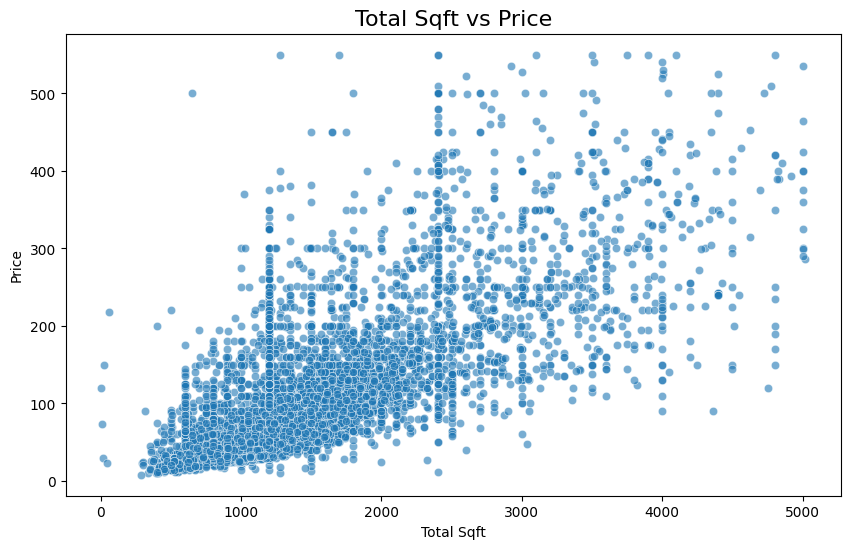

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_sqft', y='price', data=train, palette='viridis', alpha=0.6)
plt.title('Total Sqft vs Price', fontsize=16)
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show()

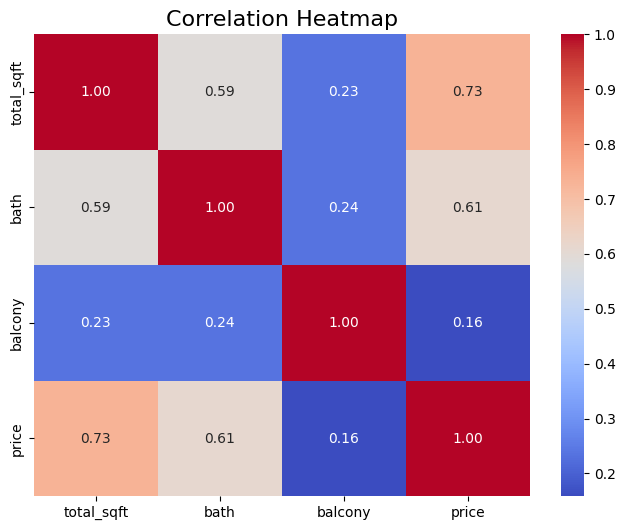

In [45]:
cols = ['total_sqft', 'bath', 'balcony', 'price']

plt.figure(figsize=(8,6))
corr_matrix = train[cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

> ###    On plotting the histogram of prices we can observe that the data is right skewed indicating very expensive properties

> ### Hence to introduce a central tendency we apply log transform on the price feature

# Feature Scaling and Encoding

## Numerical Feature Scaling
We will be using MinMaxScaler

$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

In [46]:
categorical_cols = [col for col in train.columns if train[col].dtype == 'object']
for feature in categorical_cols:
    print(f"Feature: {feature}")
    unique_classes = train[feature].unique()
    print(f"Total unique classes: {len(unique_classes)}")
    print("-" * 20)

Feature: area_type
Total unique classes: 4
--------------------
Feature: availability
Total unique classes: 76
--------------------
Feature: location
Total unique classes: 1152
--------------------
Feature: size
Total unique classes: 20
--------------------


In [51]:
class_counts = train['availability'].value_counts()
print(class_counts)

availability
Ready To Move    7944
18-Dec            243
18-May            227
18-Apr            197
18-Aug            150
                 ... 
17-Jan              1
16-Jul              1
20-May              1
14-Jul              1
15-Dec              1
Name: count, Length: 76, dtype: int64


## Categorical Features Encoding
Based on the trends from the above 2 cells we will be applying 2 different encodings for the categorical columns
- Frequency encoding for features with large number of classes prioritising the frequency of classes
- One Hot Encoding for area_type with only 4 classes as it wont bloat the number of dimensions

# Model Training

> # 7 Different models are
>
> 1. Linear Regression
> 2. Random Forest
> 3. SVM
> 4. Decision Tree
> 5. KNN
> 6. XGBoost
>  7. Gradient boost

In [49]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os

In [52]:

# =========================================
# Custom Transformers
# =========================================

class BHKExtractor(BaseEstimator, TransformerMixin):
    """Extract numeric BHK value from 'size' column."""
    def fit(self, X, y=None): 
        return self

    def transform(self, X):
        X = X.copy()
        X['bhk'] = X['size'].str.extract(r'(\d+)').astype(float)
        return X


class OutlierClipper(BaseEstimator, TransformerMixin):
    """Clip numeric features at a given percentile."""
    def __init__(self, percentile=0.99):
        self.percentile = percentile
        self.upper_limits = None

    def fit(self, X, y=None):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        self.upper_limits = X.quantile(self.percentile)
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        X = X.copy()
        for col in X.columns:
            upper = self.upper_limits[col]
            X[col] = np.where(X[col] > upper, upper, X[col])
        return X.values  # return numpy array as sklearn expects


class LocationFrequencyEncoder(BaseEstimator, TransformerMixin):
    """Frequency-encode 'location' and group rare ones."""
    def __init__(self, min_freq=5):
        self.min_freq = min_freq

    def fit(self, X, y=None):
        counts = X['location'].value_counts()
        self.freqs = counts.to_dict()
        self.common_locs = set(counts[counts >= self.min_freq].index)
        return self

    def transform(self, X):
        X = X.copy()
        X['location'] = X['location'].apply(lambda x: x if x in self.common_locs else 'Other')
        X['location_freq'] = X['location'].map(self.freqs).fillna(0)
        return X


class AvailabilityFlag(BaseEstimator, TransformerMixin):
    """Add binary column for 'Ready To Move'."""
    def fit(self, X, y=None): 
        return self

    def transform(self, X):
        X = X.copy()
        X['is_ready'] = (X['availability'] == 'Ready To Move').astype(int)
        return X

class AreaTypeProcessor(BaseEstimator, TransformerMixin):
    """Groups rare area_type values into 'Other'."""
    def __init__(self, min_freq=100):
        self.min_freq = min_freq
        self.valid_categories_ = None
        
    def fit(self, X, y=None):
        counts = X['area_type'].value_counts()
        self.valid_categories_ = set(counts[counts >= self.min_freq].index)
        return self
    
    def transform(self, X):
        X = X.copy()
        X['area_type'] = X['area_type'].apply(lambda x: x if x in self.valid_categories_ else 'Other')
        return X

# =========================================
# Preprocessing Pipeline Builder
# =========================================

def build_preprocessing_pipeline(numeric_cols, categorical_cols,scale_numeric=False):
    num_steps = [('imputer', SimpleImputer(strategy='median')),
                 ('clipper', OutlierClipper(percentile=0.99))]
    
    if scale_numeric:
        num_steps.append(('scaler', MinMaxScaler()))
    
    num_pipeline = Pipeline(num_steps)

    cat_pipeline = Pipeline([
        ('area_type_processor', AreaTypeProcessor(min_freq=100)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

    preprocessor = ColumnTransformer([
        ('num', num_pipeline, numeric_cols),
        ('cat', cat_pipeline, categorical_cols)
    ], remainder='drop')

    full_pipeline = Pipeline([
        ('bhk', BHKExtractor()),
        ('location_freq', LocationFrequencyEncoder(min_freq=5)),
        ('availability_flag', AvailabilityFlag()),
        ('preprocessor', preprocessor)
    ])

    return full_pipeline

# Load data
train = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv")

# Target and features
y = train["price"]
X = train.drop(columns=["price","id"])

#column lists
numeric_cols = ['total_sqft', 'bath', 'balcony', 'bhk', 'location_freq', 'is_ready']
categorical_cols = ['area_type']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
results=[]

# Log-transform target
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [55]:
print("\n Training Random Forest")
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_pipeline = Pipeline([
    ('preprocess', build_preprocessing_pipeline(numeric_cols, categorical_cols, scale_numeric=False)),
    ('model', rf_model)
])
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_val)
rf_r2 = r2_score(y_val, rf_preds)
rf_mse = mean_squared_error(y_val, rf_preds)
results.append(("Random Forest", rf_r2, rf_mse))
print(f"Random Forest → R²: {rf_r2:.3f} | MSE: {rf_mse:.2f}")


 Training Random Forest
Random Forest → R²: 0.481 | MSE: 9309.01


In [56]:
rf_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('bhk', BHKExtractor()),
                                 ('location_freq', LocationFrequencyEncoder()),
                                 ('availability_flag', AvailabilityFlag()),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('clipper',
                                                                                    OutlierClipper())]),
                                                                   ['total_sqft',
                                                                    'bath',
                                                                    'balcony',
                                                                    'bhk',
                                                                    'location_freq',
                                                                    'is_ready']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('area_type_processor',
                                                                                    AreaTypeProcessor()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['area_type'])]))])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [57]:
print("\n Training Linear Regression")
lr_model = LinearRegression()
lr_pipeline = Pipeline([
    ('preprocess', build_preprocessing_pipeline(numeric_cols, categorical_cols, scale_numeric=True)),
    ('model', lr_model)
])
lr_pipeline.fit(X_train, y_train_log)
lr_preds_log = lr_pipeline.predict(X_val)
lr_preds=np.expm1(lr_preds_log)
lr_r2 = r2_score(y_val, lr_preds)
lr_mse = mean_squared_error(y_val, lr_preds)
results.append(("Linear Regression", lr_r2, lr_mse))
print(f"Linear Regression → R²: {lr_r2:.3f} | MSE: {lr_mse:.2f}")


 Training Linear Regression
Linear Regression → R²: 0.455 | MSE: 9780.49


In [58]:
lr_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('bhk', BHKExtractor()),
                                 ('location_freq', LocationFrequencyEncoder()),
                                 ('availability_flag', AvailabilityFlag()),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('clipper',
                                                                                    OutlierClipper()),
                                                                                   ('scaler',
                                                                                    MinMaxScaler())]),
                                                                   ['total_sqft',
                                                                    'bath',
                                                                    'balcony',
                                                                    'bhk',
                                                                    'location_freq',
                                                                    'is_ready']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('area_type_processor',
                                                                                    AreaTypeProcessor()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['area_type'])]))])),
                ('model', LinearRegression())])

In [59]:
print("\n Training SVM")
svm_model = SVR(kernel="rbf", C=10)
svm_pipeline = Pipeline([
    ('preprocess', build_preprocessing_pipeline(numeric_cols, categorical_cols, scale_numeric=True)),
    ('model', svm_model)
])
svm_pipeline.fit(X_train, y_train)
svm_preds = svm_pipeline.predict(X_val)
svm_r2 = r2_score(y_val, svm_preds)
svm_mse = mean_squared_error(y_val, svm_preds)
results.append(("SVM", svm_r2, svm_mse))
print(f"SVM → R²: {svm_r2:.3f} | MSE: {svm_mse:.2f}")


 Training SVM
SVM → R²: 0.467 | MSE: 9556.33


In [60]:
svm_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('bhk', BHKExtractor()),
                                 ('location_freq', LocationFrequencyEncoder()),
                                 ('availability_flag', AvailabilityFlag()),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('clipper',
                                                                                    OutlierClipper()),
                                                                                   ('scaler',
                                                                                    MinMaxScaler())]),
                                                                   ['total_sqft',
                                                                    'bath',
                                                                    'balcony',
                                                                    'bhk',
                                                                    'location_freq',
                                                                    'is_ready']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('area_type_processor',
                                                                                    AreaTypeProcessor()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['area_type'])]))])),
                ('model', SVR(C=10))])

In [61]:
print("\n Training Decision Tree")
dt_model = DecisionTreeRegressor(random_state=42)
dt_pipeline = Pipeline([
    ('preprocess', build_preprocessing_pipeline(numeric_cols, categorical_cols, scale_numeric=False)),
    ('model', dt_model)
])
dt_pipeline.fit(X_train, y_train)
dt_preds = dt_pipeline.predict(X_val)
dt_r2 = r2_score(y_val, dt_preds)
dt_mse = mean_squared_error(y_val, dt_preds)
results.append(("Decision Tree", dt_r2, dt_mse))
print(f"Decision Tree → R²: {dt_r2:.3f} | MSE: {dt_mse:.2f}")


 Training Decision Tree
Decision Tree → R²: -0.303 | MSE: 23369.52


In [62]:
dt_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('bhk', BHKExtractor()),
                                 ('location_freq', LocationFrequencyEncoder()),
                                 ('availability_flag', AvailabilityFlag()),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('clipper',
                                                                                    OutlierClipper())]),
                                                                   ['total_sqft',
                                                                    'bath',
                                                                    'balcony',
                                                                    'bhk',
                                                                    'location_freq',
                                                                    'is_ready']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('area_type_processor',
                                                                                    AreaTypeProcessor()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['area_type'])]))])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [63]:
print("\n Training KNN")
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_pipeline = Pipeline([
    ('preprocess', build_preprocessing_pipeline(numeric_cols, categorical_cols, scale_numeric=True)),
    ('model', knn_model)
])
knn_pipeline.fit(X_train, y_train)
knn_preds = knn_pipeline.predict(X_val)
knn_r2 = r2_score(y_val, knn_preds)
knn_mse = mean_squared_error(y_val, knn_preds)
results.append(("KNN", knn_r2, knn_mse))
print(f"KNN → R²: {knn_r2:.3f} | MSE: {knn_mse:.2f}")


 Training KNN
KNN → R²: 0.416 | MSE: 10477.18


In [64]:
knn_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('bhk', BHKExtractor()),
                                 ('location_freq', LocationFrequencyEncoder()),
                                 ('availability_flag', AvailabilityFlag()),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('clipper',
                                                                                    OutlierClipper()),
                                                                                   ('scaler',
                                                                                    MinMaxScaler())]),
                                                                   ['total_sqft',
                                                                    'bath',
                                                                    'balcony',
                                                                    'bhk',
                                                                    'location_freq',
                                                                    'is_ready']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('area_type_processor',
                                                                                    AreaTypeProcessor()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['area_type'])]))])),
                ('model', KNeighborsRegressor())])

In [65]:
print("\n Training Gradient Boosting")
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gb_pipeline = Pipeline([
    ('preprocess', build_preprocessing_pipeline(numeric_cols, categorical_cols, scale_numeric=False)),
    ('model', gb_model)
])
gb_pipeline.fit(X_train, y_train)
gb_preds = gb_pipeline.predict(X_val)
gb_r2 = r2_score(y_val, gb_preds)
gb_mse = mean_squared_error(y_val, gb_preds)
results.append(("Gradient Boosting", gb_r2, gb_mse))
print(f"Gradient Boosting → R²: {gb_r2:.3f} | MSE: {gb_mse:.2f}")


 Training Gradient Boosting
Gradient Boosting → R²: 0.424 | MSE: 10338.27


In [66]:
gb_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('bhk', BHKExtractor()),
                                 ('location_freq', LocationFrequencyEncoder()),
                                 ('availability_flag', AvailabilityFlag()),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('clipper',
                                                                                    OutlierClipper())]),
                                                                   ['total_sqft',
                                                                    'bath',
                                                                    'balcony',
                                                                    'bhk',
                                                                    'location_freq',
                                                                    'is_ready']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('area_type_processor',
                                                                                    AreaTypeProcessor()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['area_type'])]))])),
                ('model',
                 GradientBoostingRegressor(max_depth=4, n_estimators=200,
                                           random_state=42))])

In [67]:
print("\n Training XGBoost")
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_pipeline = Pipeline([
    ('preprocess', build_preprocessing_pipeline(numeric_cols, categorical_cols, scale_numeric=False)),
    ('model', xgb_model)
])
xgb_pipeline.fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_val)
xgb_r2 = r2_score(y_val, xgb_preds)
xgb_mse = mean_squared_error(y_val, xgb_preds)
results.append(("XGBoost", xgb_r2, xgb_mse))
print(f"XGBoost → R²: {xgb_r2:.3f} | MSE: {xgb_mse:.2f}")


 Training XGBoost
XGBoost → R²: 0.347 | MSE: 11705.30


In [68]:
xgb_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('bhk', BHKExtractor()),
                                 ('location_freq', LocationFrequencyEncoder()),
                                 ('availability_flag', AvailabilityFlag()),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('clipper',
                                                                                    OutlierClipper())]),
                                                                   ['total_sqft',
                                                                    'bath',
                                                                    'balcony',
                                                                    'bhk',
                                                                    'location_f...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...))])

In [69]:
results_df = pd.DataFrame(results, columns=["Model", "R2", "MSE"])
results_df = results_df.sort_values(by="R2", ascending=False).reset_index(drop=True)
print("\nSummary:\n")
print(results_df)


Summary:

               Model        R2           MSE
0      Random Forest  0.480936   9309.010615
1                SVM  0.467146   9556.326333
2  Linear Regression  0.454647   9780.488465
3  Gradient Boosting  0.423545  10338.267298
4                KNN  0.415800  10477.184872
5            XGBoost  0.347321  11705.303508
6      Decision Tree -0.303068  23369.518604


> # Hyperparamter tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
rf_model = RandomForestRegressor(random_state=42)

rf_pipeline = Pipeline([
    ('preprocess', build_preprocessing_pipeline(numeric_cols, categorical_cols, scale_numeric=False)),
    ('model', rf_model)
])

rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=3, scoring='r2', n_jobs=1, verbose=0)
rf_grid.fit(X_train, y_train)

print("Best RF params:", rf_grid.best_params_)
rf_best_preds = rf_grid.predict(X_val)
print("RF R²:", r2_score(y_val, rf_best_preds), "| MSE:", mean_squared_error(y_val, rf_best_preds))

Best RF params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}
RF R²: 0.507158894778726 | MSE: 8838.725183224802


In [72]:
xgb_model = XGBRegressor(random_state=42, n_jobs=1)

xgb_pipeline = Pipeline([
    ('preprocess', build_preprocessing_pipeline(numeric_cols, categorical_cols, scale_numeric=False)),
    ('model', xgb_model)
])

xgb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.05, 0.1]
}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3, scoring='r2', n_jobs=1, verbose=0)
xgb_grid.fit(X_train, y_train)

print("Best XGB params:", xgb_grid.best_params_)
xgb_best_preds = xgb_grid.predict(X_val)
print("XGB R²:", r2_score(y_val, xgb_best_preds), "| MSE:", mean_squared_error(y_val, xgb_best_preds))

Best XGB params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
XGB R²: 0.612303365193752 | MSE: 6953.040185182944


In [73]:
gb_model = GradientBoostingRegressor(random_state=42)

gb_pipeline = Pipeline([
    ('preprocess', build_preprocessing_pipeline(numeric_cols, categorical_cols, scale_numeric=False)),
    ('model', gb_model)
])

gb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 4],
    'model__learning_rate': [0.05, 0.1]
}

gb_grid = GridSearchCV(gb_pipeline, gb_param_grid, cv=3, scoring='r2', n_jobs=1, verbose=0)
gb_grid.fit(X_train, y_train)

print("Best GB params:", gb_grid.best_params_)
gb_best_preds = gb_grid.predict(X_val)
print("GB R²:", r2_score(y_val, gb_best_preds), "| MSE:", mean_squared_error(y_val, gb_best_preds))

Best GB params: {'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 100}
GB R²: 0.478799322998796 | MSE: 9347.332234505959


In [75]:
#Predicting using the tuned parameters

# Random Forest
rf_best_preds = rf_grid.predict(X_val)
rf_best_r2 = r2_score(y_val, rf_best_preds)
rf_best_mse = mean_squared_error(y_val, rf_best_preds)

# XGBoost
xgb_best_preds = xgb_grid.predict(X_val)
xgb_best_r2 = r2_score(y_val, xgb_best_preds)
xgb_best_mse = mean_squared_error(y_val, xgb_best_preds)

# Gradient Boosting
gb_best_preds = gb_grid.predict(X_val)
gb_best_r2 = r2_score(y_val, gb_best_preds)
gb_best_mse = mean_squared_error(y_val, gb_best_preds)

In [76]:
# Create a mapping of model names to new metrics
tuned_metrics = {
    "Random Forest": (rf_best_r2, rf_best_mse),
    "XGBoost": (xgb_best_r2, xgb_best_mse),
    "Gradient Boosting": (gb_best_r2, gb_best_mse)
}

# Replace values in results_df
for idx, row in results_df.iterrows():
    if row['Model'] in tuned_metrics:
        results_df.at[idx, 'R2'] = tuned_metrics[row['Model']][0]
        results_df.at[idx, 'MSE'] = tuned_metrics[row['Model']][1]

# Display updated results
results_df

,Model,R2,MSE
0,Random Forest,0.507159,8838.725183
1,SVM,0.467146,9556.326333
2,Linear Regression,0.454647,9780.488465
3,Gradient Boosting,0.478799,9347.332235
4,KNN,0.415800,10477.184872
5,XGBoost,0.612303,6953.040185
6,Decision Tree,-0.303068,23369.518604


In [ ]:
X_test=test.copy()
predictions = lr_pipeline.predict(X_test)
submission = pd.DataFrame({
    'id': X_test['id'],  
    'price': predictions
})

submission.to_csv('submission.csv', index=False)
print("submission.csv created using Linear Regression pipeline!")